In [1]:
#imports
%matplotlib inline
%load_ext autoreload
%autoreload 5
%autosave 15

import pandas as pd
import math
import scipy as sp
import numpy as np
import sklearn.cross_validation as cv
import sklearn.metrics as mt
import matplotlib.pyplot as plt

Autosaving every 15 seconds


In [2]:
data = pd.read_csv("prices.csv")
data.describe()

,area,rooms,price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


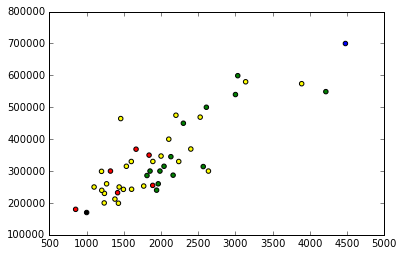

In [3]:
data = pd.read_csv("prices.csv")
col = ['BLack' if x.rooms == 1 else
       'Red'if x.rooms == 2 else
       'Yellow' if x.rooms == 3 else
       'Green' if x.rooms == 4 else
       'Blue' for i, x in data.iterrows()]
plt.scatter(data.area, data.price, c=col)
plt.show()

In [47]:
class LinearRegressor:
    regColumn = 'price'
    trainData = None
    mu = None
    eps = None
    # y' = a * rooms + b * area + c
    a = None 
    b = None
    c = None
    
        
    def stepGradient(self, points, learningRate):
        a_g = 0.0
        b_g = 0.0
        c_g = 0.0
        N = float(len(points))
        a_c = self.a
        b_c = self.b
        c_c = self.c
        for i in range(0, len(points)):
            x = points.iloc[[i]].as_matrix()
            dif = (x[0][2] - a_c * x[0][1] - b_c * x[0][0] - c_c)
            c_g += -(2/N) * dif
            b_g += -(2/N) * x[0][0] * dif
            a_g += -(2/N) * x[0][1] * dif
        self.a += -(learningRate * a_g)
        self.b += -(learningRate * b_g)
        self.c += -(learningRate * c_g)
        return
    
    def __init__(self, trainData, mu = 0.5):
        self.trainData = trainData
        self.mu = mu        
        self.a = 0.0
        self.b = 0.0
        self.c = 0.0
        N = float(len(trainData))
        self.eps = 1/(2 * N)
        last = 0.0
        while True:
            self.stepGradient(trainData, mu)
            sum = 0.0
            for (index, x) in trainData.iterrows():
                sum += (x.price - (self.a * x.rooms + self.b * x.area + self.c))**2
            cur = math.pow(sum / N, 1/2)
            if (math.fabs(last - cur) < self.eps):
                break            
            #print()
            last = cur
        print(last)    
        print(self.a, self.b, self.c)
        
    def computeFlat(self, Flat):
        return [self.a * Flat.rooms + self.b * Flat.area + self.c]        
    
    def compute(self, testData):
        return [self.computeFlat(x) for (index, x) in testData.iterrows()]

In [48]:
data = pd.read_csv("prices.csv")

#normalization
cols_to_norm = ['area', 'rooms']
meanArea = data.area.mean()
maxMinArea = data.area.max() - data.area.min()
def normalizeArea(area):
    return (area - meanArea) / maxMinArea
meanRooms = data.rooms.mean()
maxMinRooms = data.rooms.max() - data.rooms.min()
def normalizeRooms(rooms):
    return (rooms - meanRooms) / maxMinRooms

data[cols_to_norm] = data[cols_to_norm].apply(lambda x: (x - x.mean()) / (x.max() - x.min()))

reg = LinearRegressor(data)
reg.print())

63926.510817197326
-33804.0408204 503884.648758 340412.659574


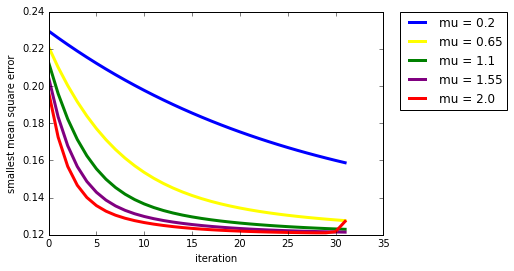

In [27]:
class LinearRegressor:
    regColumn = 'price'
    trainData = None
    mu = None
    # y' = a * rooms + b * area + c
    a = None 
    b = None
    c = None
    conv = None
    
        
    def stepGradient(self, points, learningRate):
        a_g = 0.0
        b_g = 0.0
        c_g = 0.0
        N = float(len(points))
        a_c = self.a
        b_c = self.b
        c_c = self.c
        for i in range(0, len(points)):
            x = points.iloc[[i]].as_matrix()
            dif = (x[0][2] - a_c * x[0][1] - b_c * x[0][0] - c_c)
            c_g += -(2/N) * dif
            b_g += -(2/N) * x[0][0] * dif
            a_g += -(2/N) * x[0][1] * dif
        self.a += -(learningRate * a_g)
        self.b += -(learningRate * b_g)
        self.c += -(learningRate * c_g)
        return
    
    def __init__(self, trainData, mu = 0.5, ):
        self.trainData = trainData
        self.mu = mu
        self.a = 0.0
        self.b = 0.0
        self.c = 0.0
        N = float(len(trainData))
        last = 0.0
        k = 0;
        l = 32;
        self.conv = [0]*l
        while (k < l):
            self.stepGradient(trainData, mu)
            sum = 0.0
            for (index, x) in trainData.iterrows():
                sum += (x.price - (self.a * x.rooms + self.b * x.area + self.c))**2
            cur = math.pow(sum / N, 1/2)                     
            #print()
            last = cur
            self.conv[k] = last
            k += 1;
            
        #print(self.a, self.b, self.c)
        
    def computeFlat(self, Flat):
        return [self.a * Flat.rooms + self.b * Flat.area + self.c]        
    
    def compute(self, testData):
        return [self.computeFlat(x) for (index, x) in testData.iterrows()]
data = pd.read_csv("prices.csv")

#normalization
cols_to_norm = ['area','rooms','price']
meanArea = data.area.mean()
maxMinArea = data.area.max() - data.area.min()
def normalizeArea(area):
    return (area - meanArea) / maxMinArea
meanRooms = data.rooms.mean()
maxMinRooms = data.rooms.max() - data.rooms.min()
def normalizeRooms(rooms):
    return (rooms - meanRooms) / maxMinRooms

data[cols_to_norm] = data[cols_to_norm].apply(lambda x: (x - x.mean()) / (x.max() - x.min()))

#reg = LinearRegressor(data)
#print(reg.conv)

parameters = [(0.2, 'Blue'), (0.65, 'Yellow'), (1.1, 'Green'), (1.55, 'Purple'), (2.0, 'Red')]
startIndex = 0
for (x, col) in parameters:
    reg = LinearRegressor(data, mu = x)
    plt.plot(range(startIndex, len(reg.conv)), reg.conv[startIndex:], c = col, 
             label = 'mu = ' + str(x), linewidth = 3)
plt.ylabel('smallest mean square error')
plt.xlabel('iteration')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()